<a href="https://colab.research.google.com/github/greenixproject/machine-learning/blob/main/Vehicle_Greenix/new_model/vehicle_emission_bus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EMISI CARBON (CO2) FOOTPRINT VEHICLE BUS
1. Emisi karbon banyak terutama dari aktivitas sehari-hari kendaraan bermotor salah satunya yaitu bis.
2. Awareness masyarakat masih kurang tentang karbon yang dapat dihasilkan
3. Dari permasalahan tersebut, pada project kali ini kami akan membuat prediksi emisi karbon yang dihasilkan dari kendaraan bermotor
4. Data yang kami gunakan diambil dan dikumpulkan dari survei kepada responden, jurnal dan website lainnya


In [ ]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import library
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Data

In [ ]:
# Menentukan path file CSV yang telah diunggah
file_path = '/content/drive/MyDrive/Vehicle_Greenix/Dataset/vehicle_bus.csv'

# Membaca file CSV ke DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama DataFrame
print(df.head())

   no         nama                         email bus_class fuel_type  \
0   1    Balqis **         *******lqis@gmail.com     Large    Diesel   
1   2  Azzahra ***           *******nt@gmail.com     Large    Diesel   
2   3   Brandon **          *******a@hotmail.com     Large    Diesel   
3   4     Syifa **  *******khrunnisa27@gmail.com     Large    Diesel   
4   5      Sofaa *         *******hada@gmail.com     Large    Diesel   

   bus_capacity  fuel_consumption  emission_factor  distanced  emissions  
0            50              30.0              9.0         37      12.06  
1            50              30.0              9.0         90      21.60  
2            50              30.0              9.0         91      21.78  
3            50              30.0              9.0         48      14.04  
4            50              30.0              9.0         67      17.46  


Keterangan kolom:
- nomer: Nomor urut responden
- nama: Nama responden
- email: Email responden
- bus_class : Pembagian Jenis-jenis bis berdasarkan ukuran bis dimana dibagi 3 jenis yaitu Small, Medium, Large
- bus_capacity : Kapasitas untuk masing-masing bus
- fuel_type : Pembagian Jenis bahan bakar yang biasanya digunakan pada motor di Indonesia yaitu Diesel (Solar dan Dex).
- fuel_consumption: Konsumsi bahan bakar setiap jenis bis dengan skala 1L / 100KM
- emmisions_factor: Faktor emisi berdasarkan jenis bahan bakarnya
- distanced: Jarak yang ditempuh oleh kendaraan dalam sekali perjalanan dengan satuan kilometer
- emissions: Nilai emisi yang dihasilkan tiap kendaraan dengan formula
emisi = ((jarak + konsumsi bahan bakar) * faktor emisi)

## DATA CLEANING

In [ ]:
# cek data duplikat
df.duplicated().sum()

0

In [ ]:
# Membersihkan data yang tidak lengkap (Jika ada)
df = df.dropna(axis=0)

In [ ]:
df = df.drop(['no',	'nama',	'email', 'fuel_type', 'bus_capacity'], axis=1)

## Data Preprocessing

In [ ]:
# Mengambil kolom numerik untuk perhitungan Z-score
numeric_columns = ['fuel_consumption',	'emission_factor',	'distanced', 'emissions']

In [ ]:
# Mendeteksi outliers dengan Z-score
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
# Menghilangkan data dengan Z-score lebih dari 3
data = df[filtered_entries]

## Eksplorasi Data

In [ ]:
df.head()

,bus_class,fuel_consumption,emission_factor,distanced,emissions
0,Large,30.0,9.0,37,12.06
1,Large,30.0,9.0,90,21.60
2,Large,30.0,9.0,91,21.78
3,Large,30.0,9.0,48,14.04
4,Large,30.0,9.0,67,17.46


In [ ]:
# Melihat jumlah baris dan kolom
df.shape

(660, 5)

In [ ]:
# Melihat info statistik data
df.describe()

,fuel_consumption,emission_factor,distanced,emissions
count,660.000000,660.000000,660.000000,660.000000
mean,21.539394,5.334485,51.024242,9.591435
std,8.347260,3.575825,27.325932,6.134627
min,11.500000,1.320000,5.000000,1.091100
25%,11.500000,1.320000,28.000000,4.527875
50%,16.000000,2.560000,50.000000,7.850700
75%,30.000000,9.000000,75.000000,14.085000
max,30.000000,9.000000,100.000000,23.400000


In [ ]:
# Melihat tipe data
print(df.dtypes)

bus_class            object
fuel_consumption    float64
emission_factor     float64
distanced             int64
emissions           float64
dtype: object


In [ ]:
# melihat missing values
df[df==0].count()

bus_class           0
fuel_consumption    0
emission_factor     0
distanced           0
emissions           0
dtype: int64

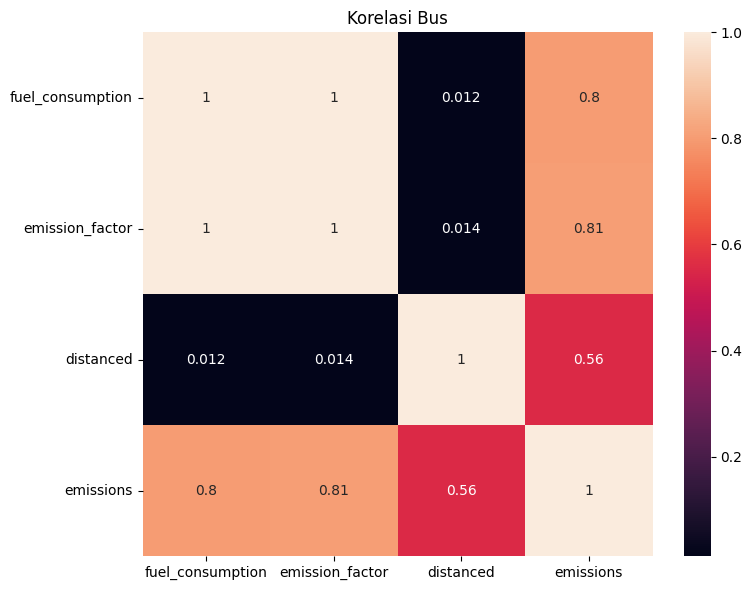

In [ ]:
bus_emissions_columns = {
    'Bus': ['fuel_consumption',	'emission_factor',	'distanced', 'emissions'],
}

# Membuat subplots untuk masing-masing bis
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Meloopi setiap bis
for bus, columns in bus_emissions_columns.items():
    # Subset kolom untuk bis tertentu
    subset = df[columns].corr()

    # Heatmap untuk bis tertentu
    sns.heatmap(subset, annot=True, ax=axes)
    axes.set_title(f'Korelasi {bus.capitalize()}')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Mengambil kolom numerik untuk perhitungan Z-score
numeric_columns = ['fuel_consumption',	'emission_factor',	'distanced', 'emissions']

### Feature Selection
Akan dilakukan pemisahan fitur dan target untuk setiap kendaraan.
Yang menjadi fitur adalah 'distanced', 'fuel_comsumption(L/100 Km)', dan 'emissions_factor', sedangkan untuk target kami adalah 'emissions'.

In [ ]:
# Memisahkan fitur dan target untuk bis
bus_features = df[['fuel_consumption',	'emission_factor',	'distanced']]
bus_target = df['emissions']

# Normalize the features

In [ ]:
# Menormalkan Fitur
scaler = StandardScaler()
bus_features_normalized = scaler.fit_transform(bus_features)

### Splitting Data
Data yang digunakan untuk training sebanyak 80% dan testing sebanyak 20%

In [ ]:
# Membagi data bis menjadi set pelatihan dan pengujian
bus_X_train, bus_X_test, bus_y_train, bus_y_test = train_test_split(bus_features, bus_target, test_size=0.2, random_state=42)

### Modelling
Melatih model dengan regresi linier untuk setiap bis

In [ ]:
# Melatih model regresi linier untuk bis
bus_model = LinearRegression()
bus_model.fit(bus_X_train, bus_y_train)

# Melakukan prediksi emisi karbon dari konsumsi bis
bus_y_pred = bus_model.predict(bus_X_test)

# Menghitung evaluasi performa model untuk bis
bus_mse = mean_squared_error(bus_y_test, bus_y_pred)
bus_r2 = r2_score(bus_y_test, bus_y_pred)

Untuk evaluasi performa model ini menggunakan MSE dibanding MAE karen beberapa pertimbangan-pertimbangan berikut:
1. Dalam perhitungan MSE, bobot yang diberikan pada kesalahan yang besar lebih tinggi karena selisih antara nilai prediksi dan nilai sebenarnya di kuadratkan. Hal ini memungkinkan pengidentifikasian dan penekanan pada outlier atau kesalahan prediksi yang signifikan dalam model. Saya mengutamakan identifikasi kesalahan prediksi yang penting dan membutuhkan perhatian lebih.
2. Selain itu saya juga ingin mengukur kesalahan prediksi dalam skala yang sama dengan variabel target, yaitu emisi karbon. MSE memberikan hasil dalam satuan kuadrat (misalnya, kg CO2e^2), yang konsisten dengan skala variabel target. Sehingga saya ingin memastikan bahwa ukuran kesalahan yang saya gunakan sesuai dengan skala yang relevan.
3. MSE memberikan penekanan lebih pada kesalahan yang lebih besar karena mengkuadratkan selisih antara prediksi dan nilai sebenarnya. Sebagai seorang data scientist, saya ingin memastikan bahwa kesalahan prediksi yang signifikan memiliki dampak yang lebih besar pada penilaian performa model.

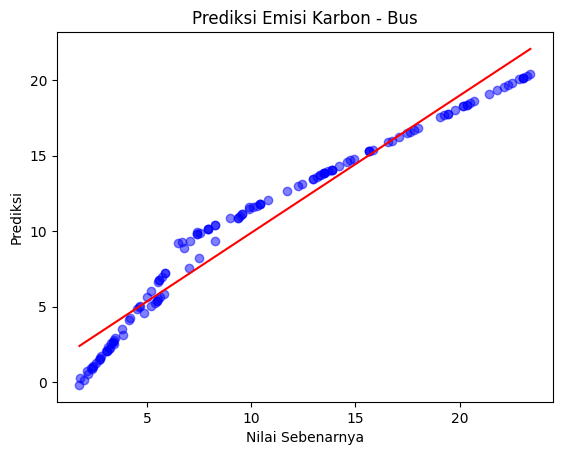

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualisasi dan garis regresi untuk bis
plt.scatter(bus_y_test, bus_y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(bus_y_test), np.poly1d(np.polyfit(bus_y_test, bus_y_pred, 1))(np.unique(bus_y_test)), color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi Emisi Karbon - Bus')
plt.show()


In [ ]:
# Menampilkan hasil evaluasi performa model
print("Hasil evaluasi performa model untuk bus:")
print("MSE:", bus_mse)
print("R-squared:", bus_r2)

Hasil evaluasi performa model untuk bus:
MSE: 2.149309302184698
R-squared: 0.949608785663476


# Interpretasi

**Evaluasi performa model untuk mobil:**
- MSE (Mean Squared Error): 2.149309302184698
- R-squared: 0.949608785663476
- Evaluasi performa model untuk mobil menunjukkan hasil yang baik. Nilai MSE yang rendah dan nilai R-squared yang cukup tinggi menunjukkan bahwa model regresi linear untuk mobil memiliki tingkat kesalahan yang relatif kecil dan mampu menjelaskan sekitar 94.96% variasi dalam emisi karbon mobil.

# Membuat model Deep Learning.
- model neural network dengan 3 layer untuk memprediksi emisi karbon dari konsumsi masing-masing kendaraan.
- menggunakan fungsi aktivasi relu pada layer pertama dan kedua, dan tidak menggunakan fungsi aktivasi pada layer output karena masalah regresi.
- Data diskalakan agar model dapat lebih efisien (menggunakan StandardScaler dari scikit-learn )

In [ ]:
# Standarisasi fitur dengan StandardScaler
scaler = StandardScaler()
bus_X_train_scaled = scaler.fit_transform(bus_X_train)
bus_X_test_scaled = scaler.transform(bus_X_test)

# Create the model
bus_model_tf = Sequential()
bus_model_tf.add(Dense(256, input_dim=bus_X_train_scaled.shape[1], activation='relu'))
bus_model_tf.add(Dense(64, activation='relu'))
bus_model_tf.add(Dense(1))

# Compile the model
bus_model_tf.compile(loss='mean_squared_error', optimizer='adam')


bus_model_tf.fit(bus_X_train_scaled, bus_y_train, epochs=20, batch_size=64, validation_split=0.2)

# Reshape the input data to have shape (None, 3)
bus_X_test_scaled_reshaped = bus_X_test_scaled.reshape(-1, 3)

# Predict the output for new data
bus_y_pred_tf = bus_model_tf.predict(bus_X_test_scaled_reshaped)

# Evaluate the model
bus_mse_tf = mean_squared_error(bus_y_test, bus_y_pred_tf)
bus_rmse_tf = np.sqrt(bus_mse_tf)
bus_r2_tf = r2_score(bus_y_test, bus_y_pred_tf)

print("Hasil evaluasi performa model TensorFlow untuk Bus:")
print("MSE:", bus_mse_tf)
print("RMSE:", bus_rmse_tf)
print("R-squared:", bus_r2_tf)

Epoch 1/20
7/7 [==============================] - 1s 41ms/step - loss: 115.9984 - val_loss: 125.6507
Epoch 2/20
7/7 [==============================] - 0s 15ms/step - loss: 103.1100 - val_loss: 111.2312
Epoch 3/20
7/7 [==============================] - 0s 12ms/step - loss: 89.4574 - val_loss: 93.5597
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 72.4821 - val_loss: 72.8195
Epoch 5/20
7/7 [==============================] - 0s 16ms/step - loss: 54.2387 - val_loss: 50.2879
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 35.7426 - val_loss: 28.8524
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 18.6456 - val_loss: 12.5365
Epoch 8/20
7/7 [==============================] - 0s 10ms/step - loss: 7.5358 - val_loss: 4.1761
Epoch 9/20
7/7 [==============================] - 0s 11ms/step - loss: 3.5731 - val_loss: 2.7176
Epoch 10/20
7/7 [==============================] - 0s 7ms/step - loss: 2.9779 - val_loss: 2.2655
Epoch 11/20


**SAVE MODEL**
### kita akan save model dalam bentuk h5 dan sebagai alternatif akan dikonversi kedalam bentuk tflite.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
bus_model_tf.save('/content/gdrive/MyDrive/Vehicle_Greenix/Model/bus_model.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model.
model = load_model('/content/gdrive/MyDrive/Vehicle_Greenix/Model/bus_model.h5')

# Convert the model to TFLite.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model.
with open('bus_model.tflite', 'wb') as f:
    f.write(tflite_model)

bus_model_tf.save('/content/gdrive/MyDrive/Vehicle_Greenix/Model/bus_model.tflite')

In [ ]:
from tensorflow.keras.models import load_model

# Load model
bus_model = load_model('/content/gdrive/MyDrive/Vehicle_Greenix/Model/bus_model.h5')

Make Prediction New Data With Our Model


In [ ]:
import tensorflow as tf
import numpy as np

# Load the model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Vehicle_Greenix/Model/bus_model.h5')

# Define the new data
distance = 100
fuel_consumption = 5
placeholder_value = 0

# Scale the new data
new_data = np.array([[distance, fuel_consumption, placeholder_value]])

# Make a prediction
prediction = model.predict(new_data)

# Print the prediction
print("Prediksi Emisi Bus adalah:", prediction[0])

Prediksi Emisi Bus adalah: [611.8526]
